## Exploratory Data Analysis (EDA) - Fraud Detection
### Task 1: Data Analysis and Preprocessing

#### 1. Load Data

In [6]:
import sys
import pandas as pd
import numpy as np

# Add src to path to import our custom module
sys.path.append('../src')
from eda_utils import FraudEDA
from preprocessing import FraudPreprocessor # Ensure preprocessing.py is in src/

# autoreload to reload modules when they change
%load_ext autoreload
%autoreload 2

In [ ]:
# Load the raw datasets.

# Adjust paths as necessary
fraud_df = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')
creditcard_df = pd.read_csv('../data/raw/creditcard.csv')

print("Fraud Data Shape:", fraud_df.shape)
print("Credit Card Data Shape:", creditcard_df.shape)

Fraud Data Shape: (151112, 11)
Credit Card Data Shape: (284807, 31)


#### 2. Data Cleaning & Feature Engineering
We perform cleaning and feature engineering first (Task 1.1, 1.3, 1.4) so we can analyze the derived features (like 'country' and 'time_since_signup').

In [10]:
# Initialize Preprocessor
preprocessor = FraudPreprocessor(fraud_df, ip_df)

# Run basic cleaning and merging
print("Cleaning data...")
df_clean = preprocessor.clean_data()
print("Merging geolocation...")
df_merged = preprocessor.merge_geolocation()
print("Engineering features...")
df_final = preprocessor.feature_engineering()

# Display first few rows to confirm new features
df_final[['user_id', 'country', 'time_since_signup', 'hour_of_day', 'device_transaction_count']].head()


Cleaning data...
Merging geolocation...
Converting IPs to integers...
Merging geolocation data...
Engineering features...


,user_id,country,time_since_signup,hour_of_day,device_transaction_count
0,22058,Unknown,4506682.0,2,1
1,333320,Unknown,17944.0,1,1
2,1359,Unknown,1.0,18,12
3,150084,Unknown,492085.0,13,1
4,221365,Unknown,4361461.0,18,1


#### 3. Univariate Analysis

Analyze distributions of key variables.

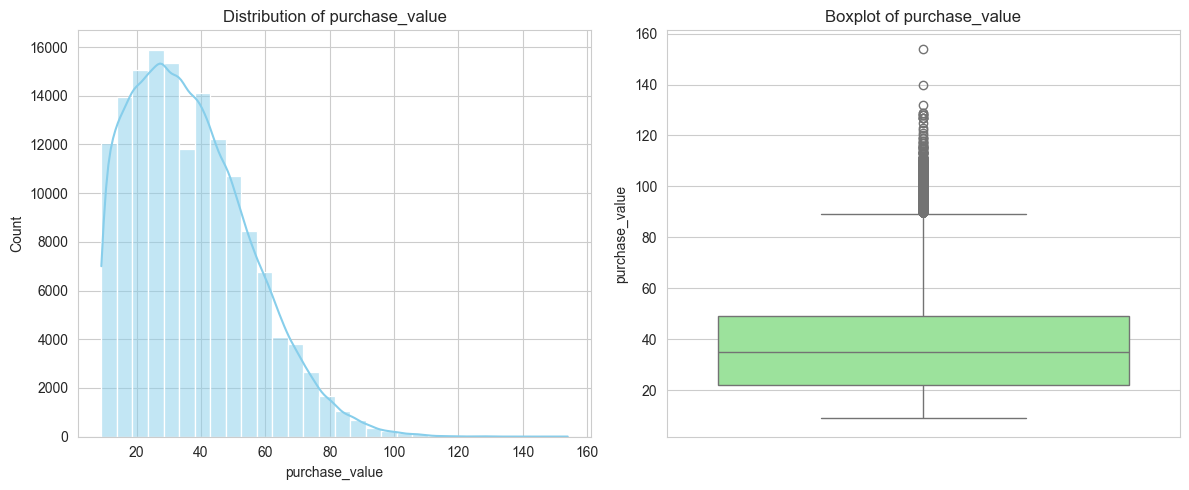

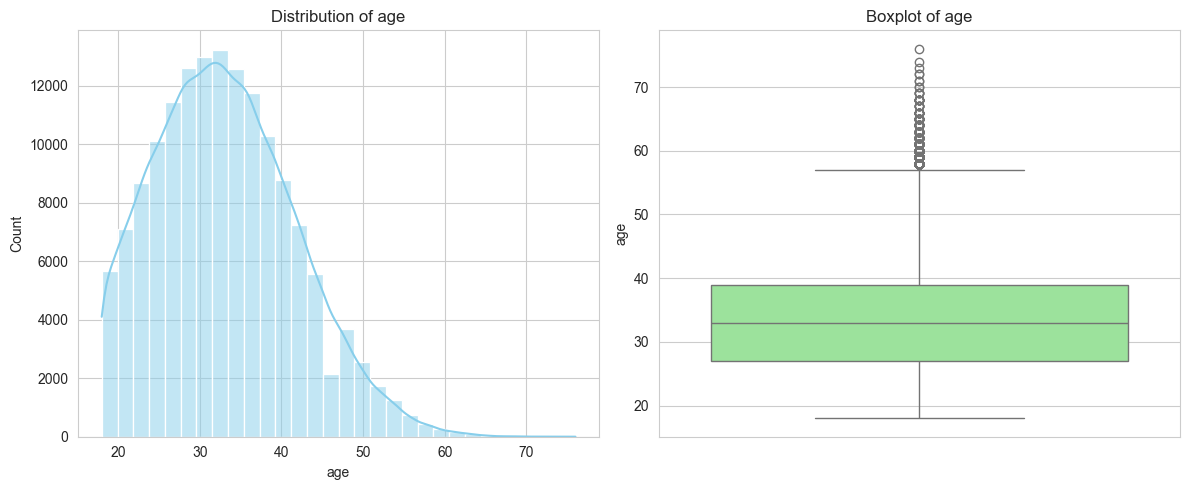

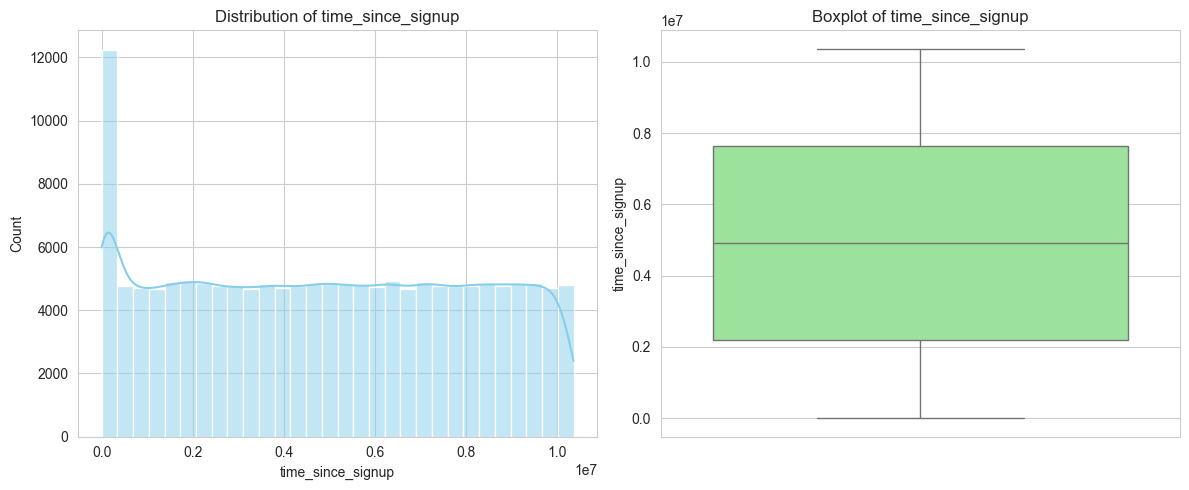

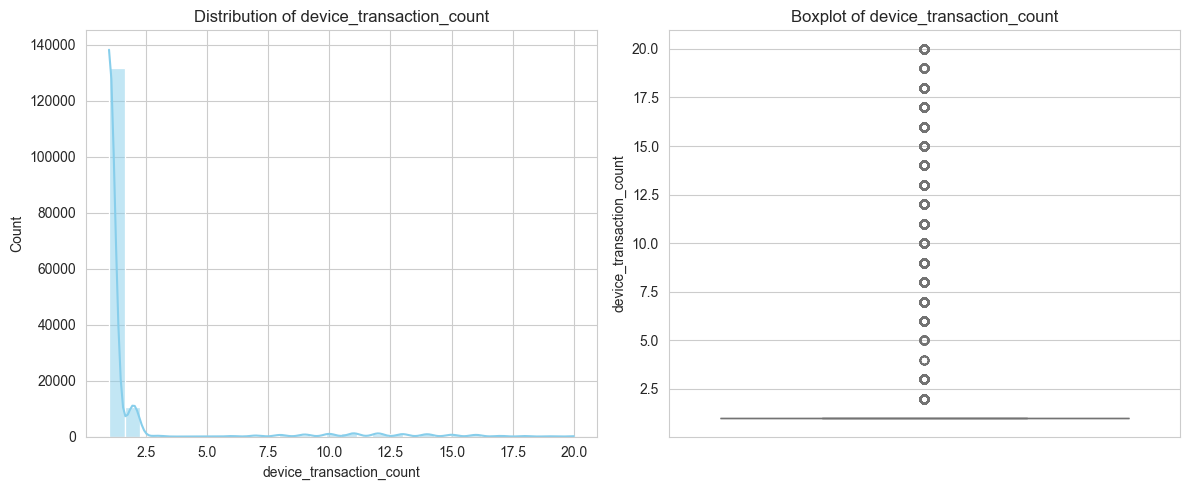

e:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_5-6\KAIM_Week5-6\notebooks\../src\eda_utils.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=filtered_data, order=top_cats, palette='magma')


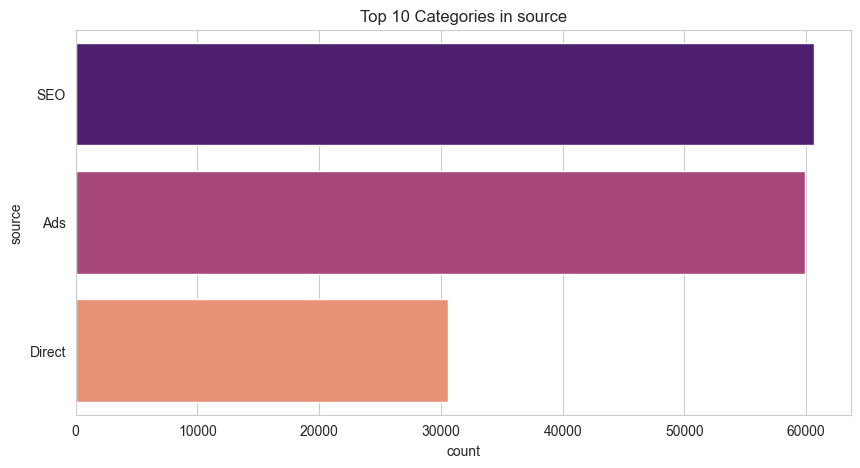

e:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_5-6\KAIM_Week5-6\notebooks\../src\eda_utils.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=filtered_data, order=top_cats, palette='magma')


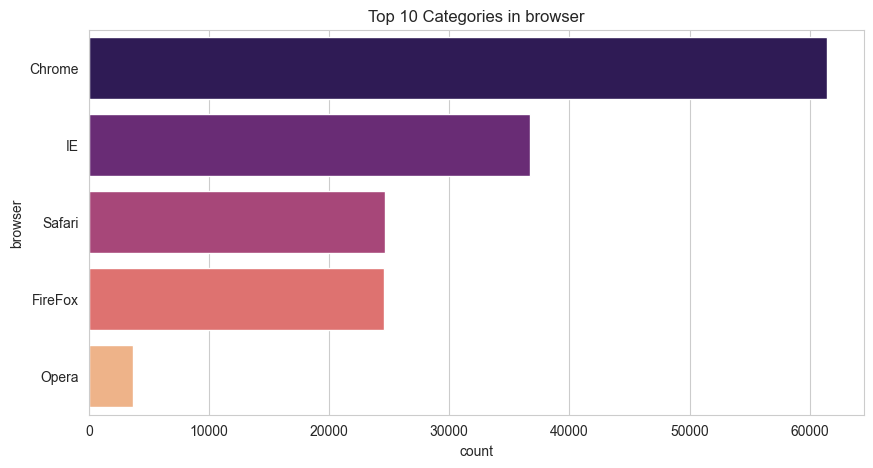

e:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_5-6\KAIM_Week5-6\notebooks\../src\eda_utils.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=filtered_data, order=top_cats, palette='magma')


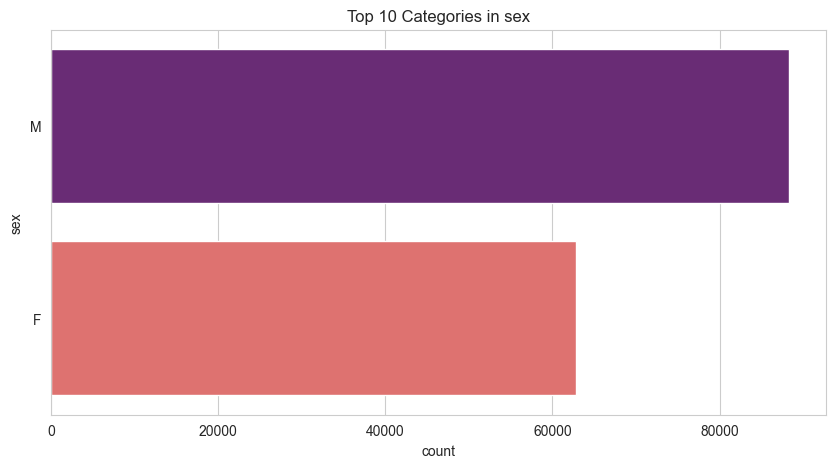

e:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_5-6\KAIM_Week5-6\notebooks\../src\eda_utils.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=filtered_data, order=top_cats, palette='magma')


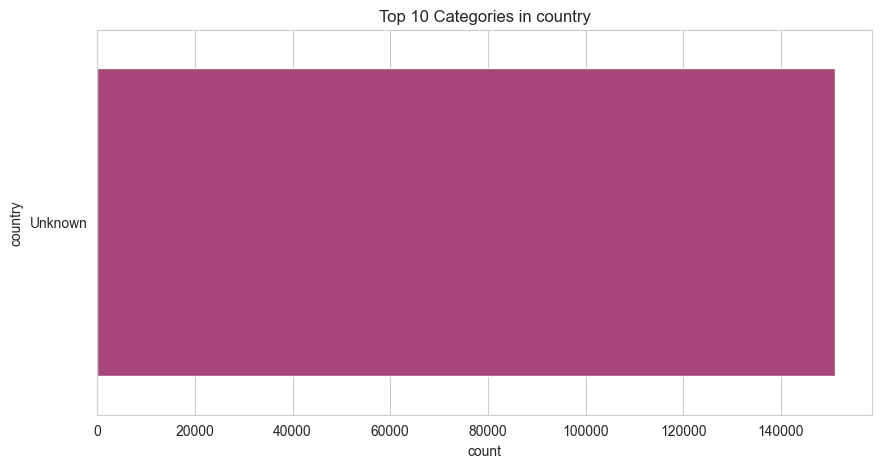

In [11]:

eda = FraudEDA(df_final)

# Numerical features to analyze
num_features = ['purchase_value', 'age', 'time_since_signup', 'device_transaction_count']
eda.plot_numerical_distributions(num_features)

# Categorical features to analyze
cat_features = ['source', 'browser', 'sex', 'country']
eda.plot_categorical_distributions(cat_features)


#### 4. Class Distribution Analysis

Quantify the severe class imbalance


Class Distribution:
class
0    136961
1     14151
Name: count, dtype: int64

Percentage:
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


e:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_5-6\KAIM_Week5-6\notebooks\../src\eda_utils.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=self.df, palette='viridis')


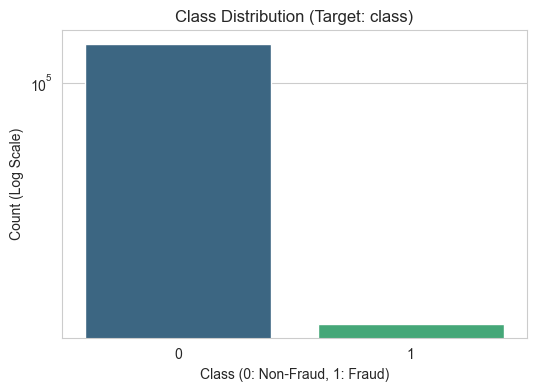

In [12]:

eda.plot_class_distribution(target_col='class')

#### 5. Bivariate Analysis

Analyze relationships between features and the target variable to find fraud patterns.



e:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_5-6\KAIM_Week5-6\notebooks\../src\eda_utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=self.df, palette='coolwarm')


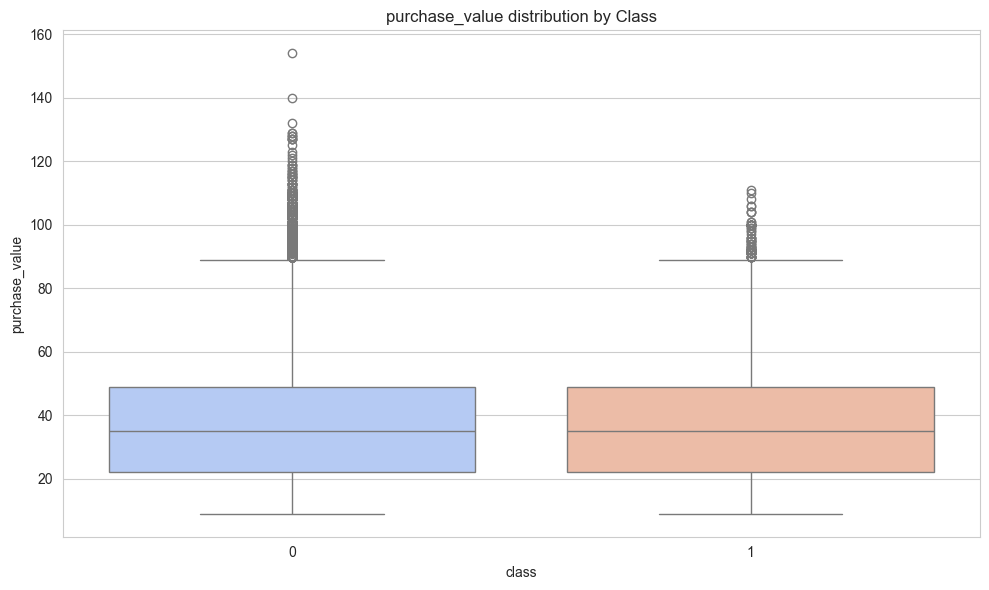

e:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_5-6\KAIM_Week5-6\notebooks\../src\eda_utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=self.df, palette='coolwarm')


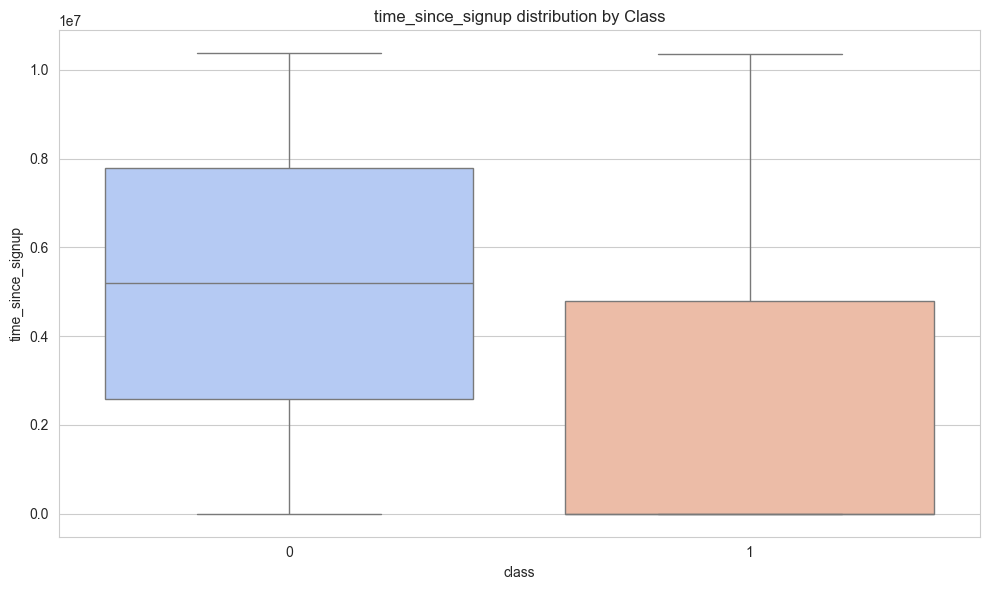

e:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_5-6\KAIM_Week5-6\notebooks\../src\eda_utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=self.df, palette='coolwarm')


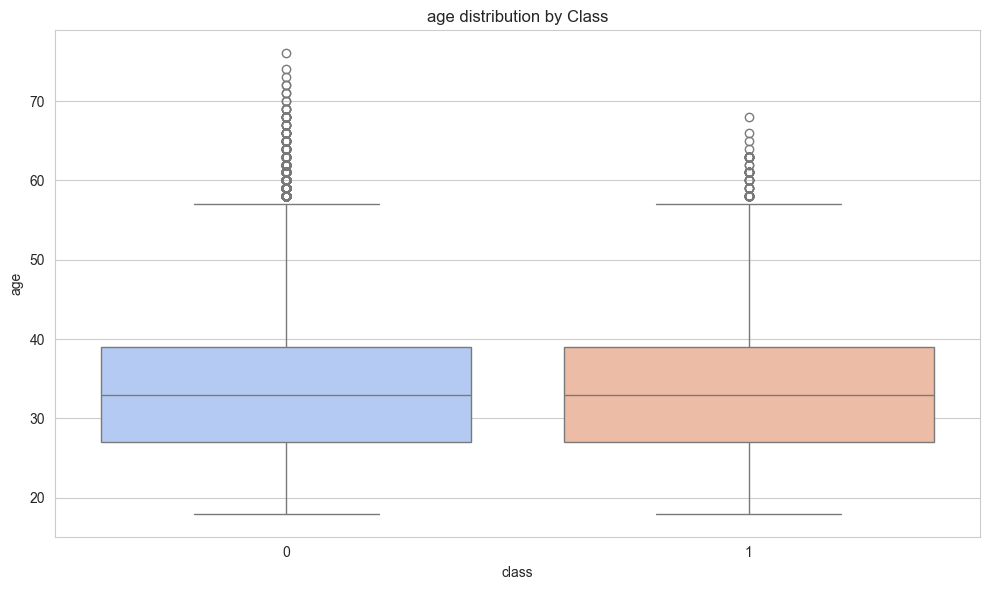

<Figure size 1000x600 with 0 Axes>

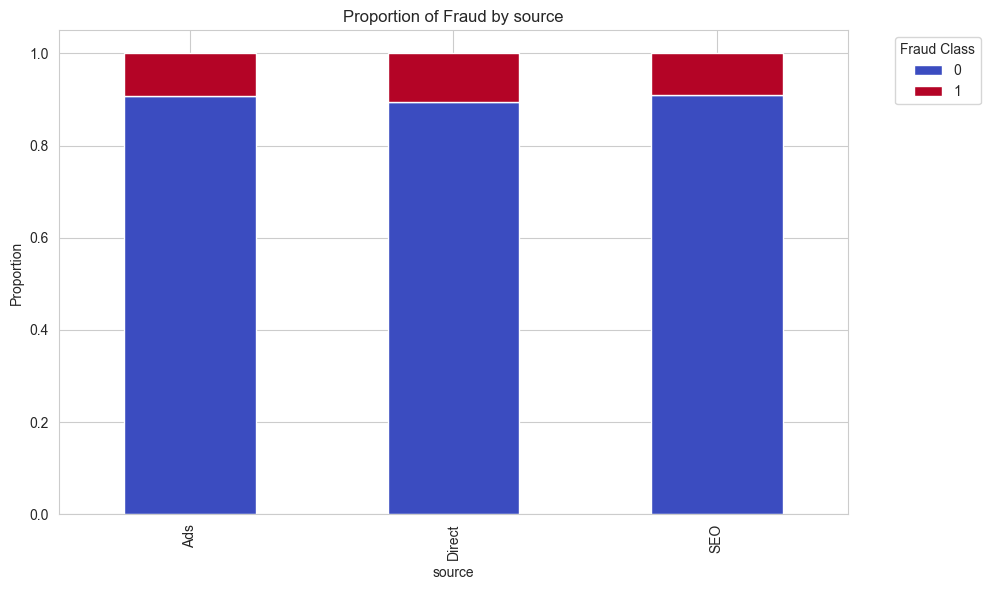

<Figure size 1000x600 with 0 Axes>

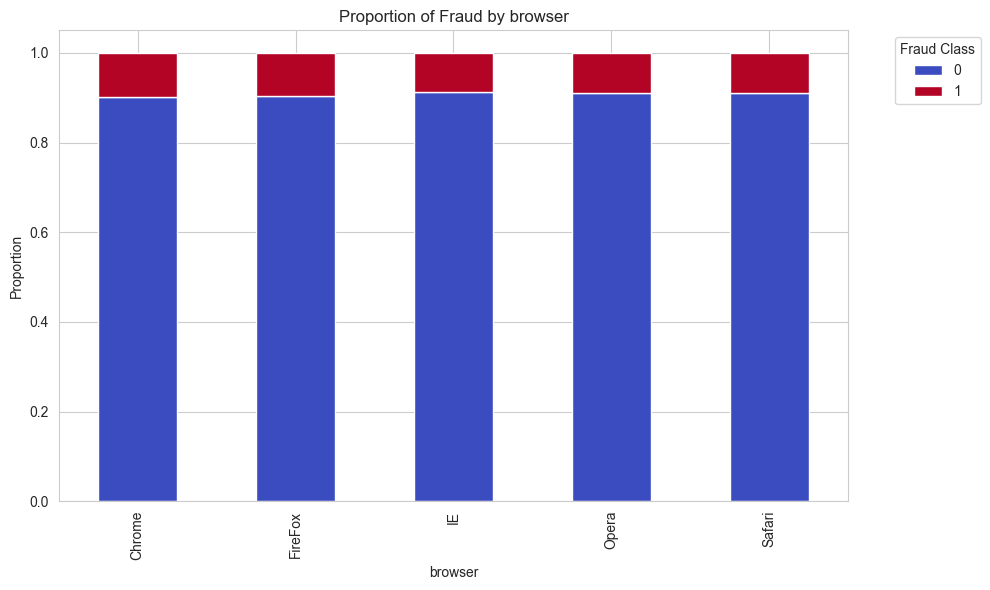

In [13]:

# Check how purchase value or time since signup differs for Fraud (1) vs Non-Fraud (0)
eda.plot_bivariate_analysis(target_col='class', features=['purchase_value', 'time_since_signup', 'age'])

# Check fraud rates by Source or Browser
# This helps identify if specific channels (e.g., SEO vs Ads) have higher fraud rates
eda.plot_bivariate_analysis(target_col='class', features=['source', 'browser'])


#### 6. Correlation Analysis
 Check for relationships between numerical variables.


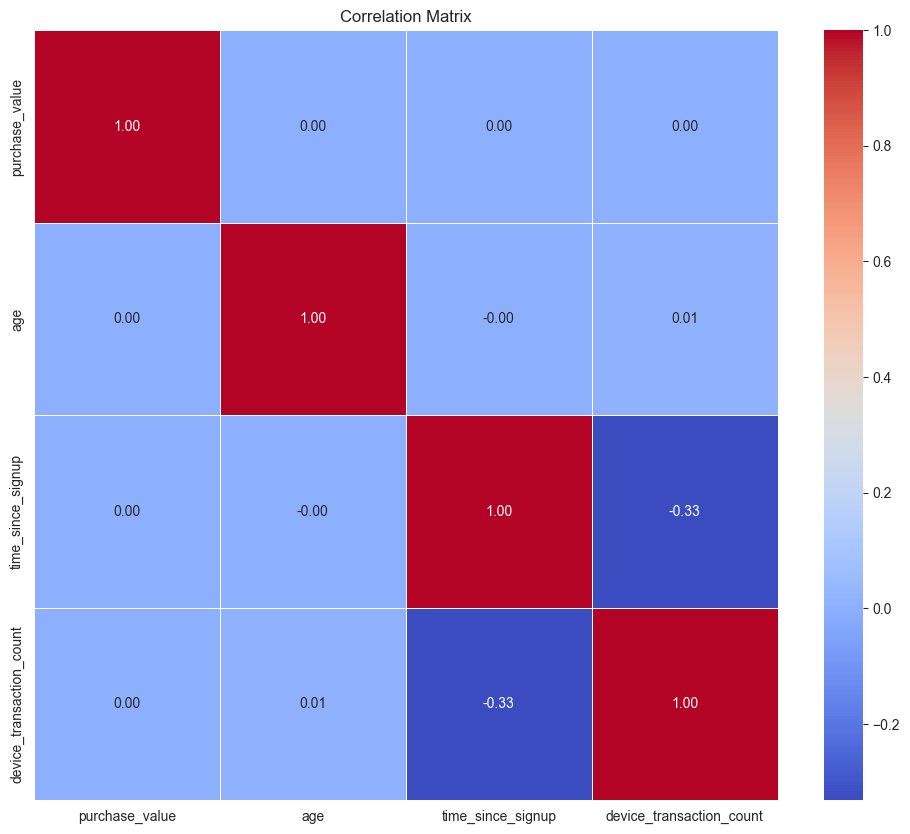

In [14]:
eda.correlation_heatmap(num_features)